# Individual Analysis for the Franck-Hertz Experiment

Use this template to carry out the analysis tasks for the experiment.  You may need to consult the documentation for different Python packages.  Also recommended: the [Whirlwind Tour of Python](https://jakevdp.github.io/WhirlwindTourOfPython/) and the [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/) both by Jake VanderPlas.

We will also be using [**LMFit**](https://lmfit.github.io/lmfit-py/) for curve fitting 
and the [Uncertainties](https://pythonhosted.org/uncertainties/) package for calculating statistical uncertainty. 

In [1]:
# Run this cell with Shift-Enter, and wait until the asterisk changes to a number, i.e., [*] becomes [1]
import numpy as np
import scipy.constants as const
import uncertainties as unc
import uncertainties.unumpy as up
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
import seaborn as sns
sns.set_theme()

In [3]:
from lmfit.models import LinearModel, QuadraticModel

## Summary of tasks

### Prior to working on this notebook

1. Watch the videos on the experiment and work out at least exercises 2 and 3 on the mean free path of electrons in the mercury F-H tube given in the experiment instructions.  These will be relevant to the "RSB" method of analyzing Franck-Hertz data.


2. Read through the paper by Rapior, Sengstock and Baev (RSB) linked on the experiment page: Rapior, G., K. Sengstock, and V Baev, <a href="http://courses.washington.edu/phys432/restricted/AJP_rapior_sengstock_baev.pdf" target="_blank">"New features of the Franck-Hertz experiment,"</a> <i>Am. J. Phys.,</i> <strong>74</strong>, p. 423-428 (2006).  Also study the lecture notes on this paper.


3. Download the PDFs of the chart-recorder scans for the two Franck-Hertz data runs (one for Hg, the other for Ne).


4. Extract from the scans the positions in paper-grid units of (1) calibration marks, (2) positions of anode current minima ("troughs") and maxima ("peaks"), and, for neon (3) positions of the small features (tiny peaks and troughs) seen in the neon-scan lock-in amp output.  The separations of similar features will be used to estimate the 3s-3p state separation.  **You do not need to estimate the uncertainty in these measurements**, but make your estimates of position to within 1/10 of small square.


5. Assign numbers to each anode current feature, for example, 1, 2, 3,... for peak 1, peak 2, peak 3... and similarly for the troughs.  (Not necessary for the Ne lock-in scan; these will be analyzed differently.)


6. Create spreadsheets with these data to be read into the notebook for further processing.

### Tasks for this notebook

For the neon data set:

* Plot and fit the calibration data.  Create a calibration function to turn feature positions into voltages.


* Apply the calibration to all of the position measurements.


* For the anode current peaks and troughs, analyze each set in three different ways:
  1. Fit a line through the peak/trough position vs. number.  From this obtain the average energy difference.
  2. Fit a quadratic through the peak/trough positions vs. number.  From this obtain the fit parameters to use in the RSB formalism.
  3. Take first differences of the peak/trough positions, and plot/fit these to a line.  The fit line should extrapolate to the energy of the first excited state, acccording to the RSB formalism.  Test this idea with a calculation from the fit.


* From the measurements taken from the lock-in scan for neon, take differences between adjacent features that indicate transitions between the 3s and 3p states.  Look at the list of differences to see if they have about the same value, and check any outliers against the original XY plot.  Then calculate an average and uncertainty to compare to the expected 1.7 V average separation between these states.

For the mercury data set:

* Plot and fit the calibration data.  Create a calibration function to turn feature positions into voltages.


* Apply the calibration to all of the position measurements.


* For the anode current peaks and troughs, analyze each set in three different ways:
  1. Fit a line through the peak/trough position vs. number.  From this obtain the average energy difference.
  2. Fit a quadratic through the peak/trough positions vs. number.  From this obtain the fit parameters to use in the RSB formalism.
  3. Take first differences of the peak/trough positions, and plot/fit these to a line.  The fit line should extrapolate to the energy of the first excited state, acccording to the RSB formalism.  Test this idea with a calculation from the fit.

* Use the fit coefficients associated with the RSB method to estimate the mean free path of the electrons between collisions with Hg atoms.  You will also need a dimension from the picture of the Hg tube.  Compare this result to the one calculated from the exercises and to the results cited by RSB in their paper.


## Read in the Franck-Hertz Data

You will probably want 4 to 5 different DataFrames: Neon calibration, neon peak/trough positions, neon small-feature positions, Mercury calibration, and mercury peak/trough positions.

One way to do it is create a different CSV file for each DataFrame.  Another way is to put each spreadsheet on a different Excel sheet within a single Excel file.  You can read the whole file into a Pandas "OrderedDict"
with the command 

    `FHdata = pd.read_excel('Franck-Hertz_data.xlsx', sheet_name = None)`

Then each sheet will be in its own DataFrame that you would reference with `FHdata['sheet-name']`.

In [4]:
# Example
FHdata = pd.read_excel('Data/Franck-Hertz_data.xlsx',sheet_name=None)      
# The keys are the sheet names
FHdata.keys()

dict_keys(['Hg1', 'Hg2', 'Ne1', 'Ne2'])

In [5]:
# we have taken two datasets for each elements
# we will only include one for each here for easier grading, but both in the lab group notebook and individual analysis

mercury1 = FHdata["Hg1"]
mercury2 = FHdata["Hg2"]  
neon1 = FHdata["Ne1"]  
neon2 = FHdata["Ne2"]  

## Neon Analysis

Calibration first.  Fit a line to the calibration data, create a calibration function.

In [6]:
def calibration(V, grid):
    grid = grid.dropna()
    V = V.dropna()
    slope, intercept = np.polyfit(grid, V, 1)
    return slope,intercept

### Fit a line

You know how to do this.  Save the fit results to use in the calibration function

In [7]:
##  Hint: make a function to do the fitting and plotting of the fit
##  Have it return the fit parameters as a Parameters object, like this

def model_fit_and_plot(xdata,ydata,model=LinearModel(),xlabel="Peak/Trough Number",ylabel="Peak/Trough Position (V)",title=""):
    params = model.make_params()
    model_fit = model.fit(ydata, params, x=xdata)
    
    ####plot here
    
    myfig = plt.figure(figsize=(10,10))
    model_fit.plot(fig=myfig, 
                   xlabel=xlabel, 
                   ylabel=ylabel,
                   title=title);
    
    return model_fit.params


### Write a calibration function

Pass your fit constants to the calibration function.  Test it.

In [8]:
data = neon1
element = "Neon"

# calibrating the grid here. From here, obtain the slope and intercept.
V = data["V"].dropna()
grid = data["starting position "].dropna()
slope, intercept = calibration(V, grid)

### Apply the calibration

You might want to add columns of the calibrated data to the existing DataFrame, or make new DataFrames or arrays.  It is up to you.

In [9]:
voltage_peak = data["peak position"].dropna() * slope + intercept
voltage_trough = data["trough position"].dropna() * slope + intercept
small_features = data["lock-in feature point"].dropna() * slope + intercept

voltage_trough
np.arange(1, len(voltage_trough))

array([1, 2])

Make a plot, just to check that it looks OK.

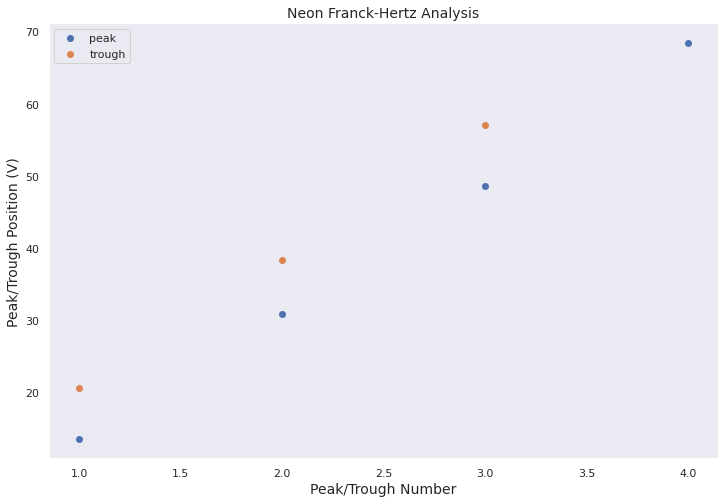

In [10]:
plt.figure(figsize=(12,8))
plt.grid()
plt.title('Neon Franck-Hertz Analysis',fontsize=14)
plt.ylabel('Peak/Trough Position (V)',fontsize=14)
plt.xlabel('Peak/Trough Number',fontsize=14)
peak = plt.scatter(np.arange(1, len(voltage_peak)+1), voltage_peak, label='peak')
trough = plt.scatter(np.arange(1, len(voltage_trough)+1), voltage_trough, label='trough')

plt.legend(handles=[peak,trough]);

### Fit the peak/trough positions 

Fit the peak and trough positions versus number in two different ways: with a line, to find the average spacing, and with a quadratic, to find the coefficients to apply to the model of RSB.  Save the fit results.  Recommended: just same the `params` object as a whole.

To fit to a quadratic, you may us the `QuadraticModel` in exactly the same way as the `LinearModel`.  Look up **QuadraticModel** in the LMFit documenation for details.

#### Neon troughs first

name,value,standard error,relative error,initial value,min,max,vary
slope,18.2101130,0.32810463,(1.80%),1.0,-inf,inf,True
intercept,2.22187896,0.70878700,(31.90%),0.0,-inf,inf,True


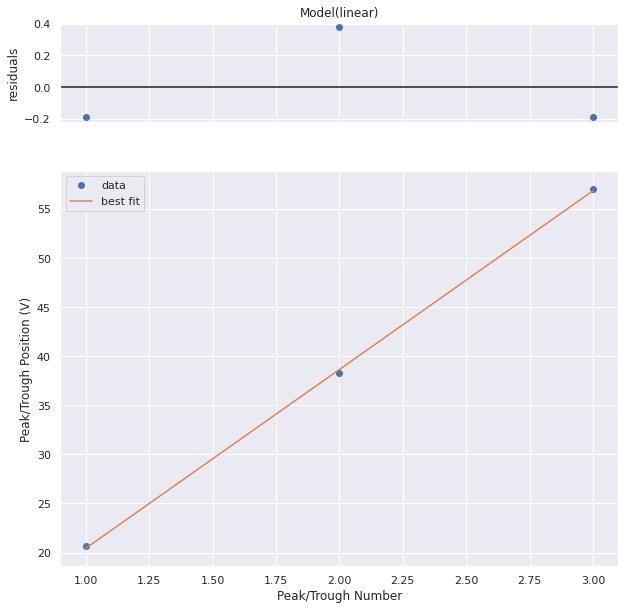

In [11]:
# Troughs line fit
params_trough_linear = model_fit_and_plot(np.arange(1, len(voltage_trough)+1), voltage_trough)
params_trough_linear

name,value,standard error,relative error,initial value,min,max,vary
a,0.56829389,1.2307e-14,(0.00%),0.0,-inf,inf,True
b,15.9369374,4.9738e-14,(0.00%),0.0,-inf,inf,True
c,4.11619194,4.3801e-14,(0.00%),0.0,-inf,inf,True


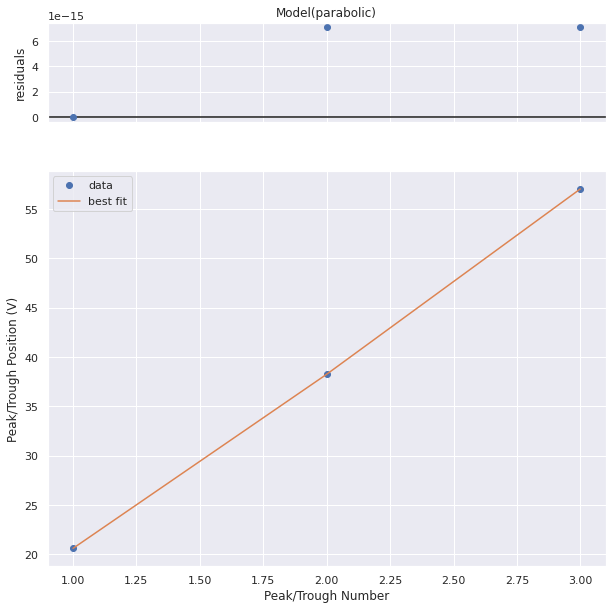

In [12]:
# Now with a quadratic
params_trough_quadratic = model_fit_and_plot(np.arange(1, len(voltage_trough)+1), voltage_trough, model=QuadraticModel())
params_trough_quadratic

#### Now neon peaks

name,value,standard error,relative error,initial value,min,max,vary
slope,18.2348214,0.40449444,(2.22%),1.0,-inf,inf,True
intercept,-5.22359464,1.10775362,(21.21%),0.0,-inf,inf,True


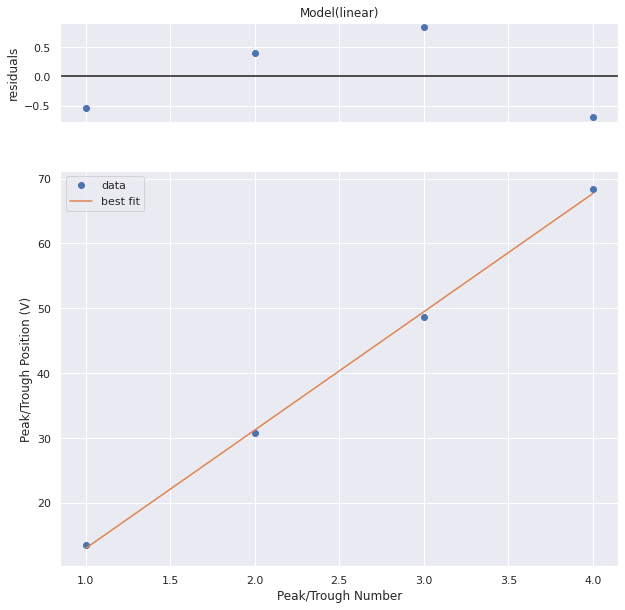

In [13]:
# Peaks line fit
params_peak_linear = model_fit_and_plot(np.arange(1, len(voltage_peak)+1), voltage_peak)
params_peak_linear

name,value,standard error,relative error,initial value,min,max,vary
a,0.61771075,0.16574914,(26.83%),0.0,-inf,inf,True
b,15.1462677,0.84190127,(5.56%),0.0,-inf,inf,True
c,-2.13504088,0.92285227,(43.22%),0.0,-inf,inf,True


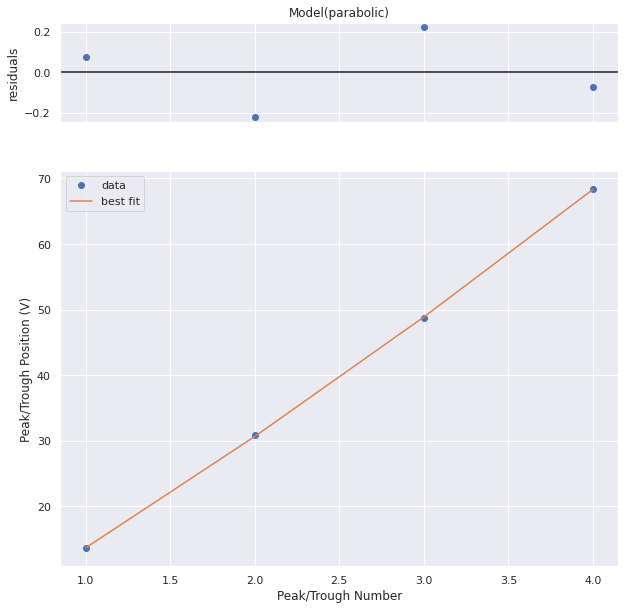

In [14]:
# Peaks quadratic
params_peak_quadratic = model_fit_and_plot(np.arange(1, len(voltage_peak)+1), voltage_peak, model=QuadraticModel())
params_peak_quadratic

### Plot the fitlines over the data

Show, on a single plot, the peak positions, the trough positions (both as dots) with fit lines and fit curves for each.  One member of the grou should include this plot in your Group Document.

Use the `model.eval()` function with the saved parameters to build fit lines. 

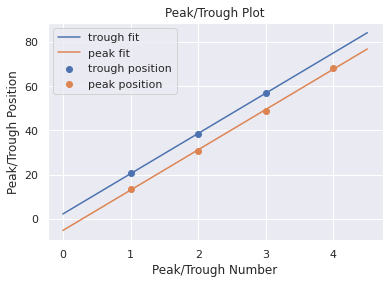

In [15]:
# For a smooth curve make an x range with a bunch of points.  100 should be fine.
xfit = np.linspace(0,4.5,100) 
trough_line = LinearModel().eval(params_trough_linear,x=xfit)
figure, ax = plt.subplots(1,1)
ax.plot(xfit, trough_line, label="trough fit")
peak_line = LinearModel().eval(params_peak_linear, x=xfit)
plt.plot(xfit, peak_line, label="peak fit")
ax.scatter(np.arange(1, len(voltage_trough)+1), voltage_trough, label="trough position")
plt.scatter(np.arange(1, len(voltage_peak)+1), voltage_peak, label="peak position")
plt.xlabel("Peak/Trough Number")
plt.ylabel("Peak/Trough Position")
plt.title("Peak/Trough Plot")
plt.legend()
# Add more, as needed

# Then redo the above plot with fit lines and curves


### Take differences in peak/trough positions

Next, apply the RSB approach as they describe it, by taking the <i>differences</i> in the positions of subsequent features to create an array $\Delta E(n) = E_n - E_{n-1}$; note $n$ is the upper number.

Then, plot and fit these to a line.  The energy of the lowest excited state should be given by $\Delta E(0.5)$.  Save the fit parameters as before.

In [16]:
# Recommended: use Python "List comprehensions"  See the Python text on how to make these
Ne_peak_diffs = voltage_peak[1:4].to_numpy() - voltage_peak[0:3].to_numpy()
Ne_trough_diffs = voltage_trough[1:3].to_numpy() - voltage_trough[0:2].to_numpy()

# Have a look at them, e.g., 
print('List of Neon peak differences (V):', Ne_peak_diffs)
print('List of Neon trough differences (V):', Ne_trough_diffs)

List of Neon peak differences (V): [17.29590108 17.79006969 19.7667441 ]
List of Neon trough differences (V): [17.64181911 18.77840689]


name,value,standard error,relative error,initial value,min,max,vary
slope,1.13658779,0.00000000,(0.00%),1.0,-inf,inf,True
intercept,16.5052313,0.00000000,(0.00%),0.0,-inf,inf,True


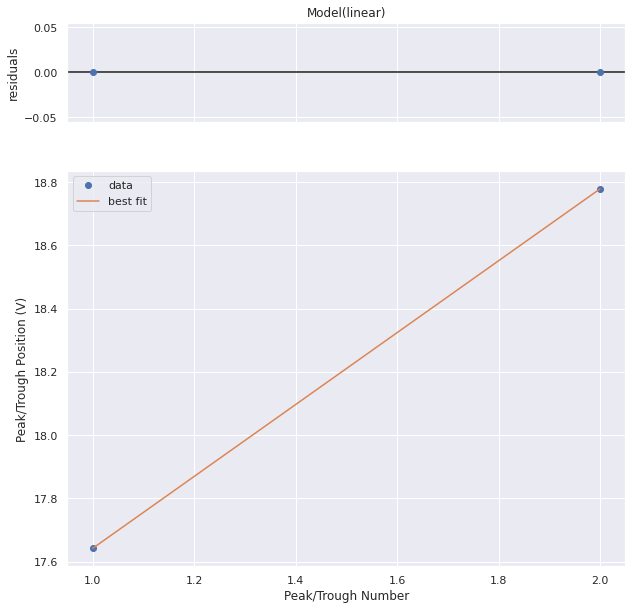

In [17]:
# Fit of line to trough diffs
p_trough = model_fit_and_plot(np.arange(1, len(Ne_trough_diffs)+1), Ne_trough_diffs)
p_trough

name,value,standard error,relative error,initial value,min,max,vary
slope,1.23542151,0.42796259,(34.64%),1.0,-inf,inf,True
intercept,15.8133953,0.92450488,(5.85%),0.0,-inf,inf,True


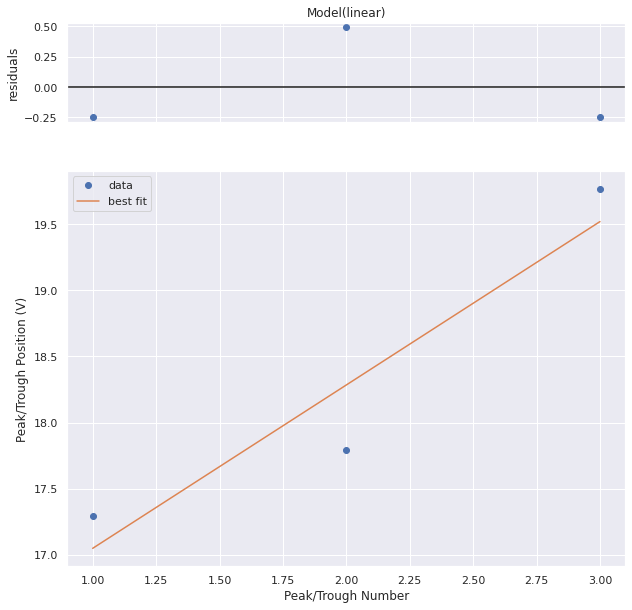

In [18]:
# Next, peak diffs
p_peak = model_fit_and_plot(np.arange(1, len(Ne_peak_diffs)+1), Ne_peak_diffs)
p_peak

### Make a differences plot

Show, on a single plot, the peak position differences, the trough position differences (both as dots) with fit lines for each.  One member of the grou should include this plot in your Group Document.

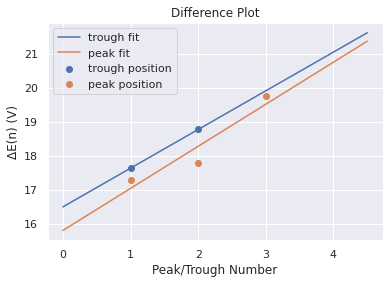

In [19]:
# Plot here
xfit = np.linspace(0,4.5,100) 
trough_line = LinearModel().eval(p_trough,x=xfit)
plt.plot(xfit, trough_line, label="trough fit")
peak_line = LinearModel().eval(p_peak,x=xfit)
plt.plot(xfit, peak_line, label="peak fit")
plt.scatter(np.arange(1, len(Ne_trough_diffs)+1), Ne_trough_diffs, label="trough position")
plt.scatter(np.arange(1, len(Ne_peak_diffs)+1), Ne_peak_diffs, label="peak position")
plt.xlabel("Peak/Trough Number")
plt.ylabel("ΔE(n) (V)")
plt.title("Difference Plot")
plt.legend()

## Final results for neon excited state

Compare fit coefficients from the quadratic to similar from the RSB difference method.  Then calculate values for the lowest excited state of Neon from the three methods of analyzing the data set: simple average peak spacing, and RSB calculation from the results of the other two fits.

From the RSB analysis, expect energy troughs to follow

$$ E_n = E_a\frac{\lambda}{L}n^2 + E_an + c  = an^2 + bn +c$$

where $c$ is a constant, $n$ is the trough number, $\lambda/L$ is the ratio of the mean free path to the total travel distance from electrode to electrode, and $E_a$ is the lowest excited state.

Taking differences, RSB derive

$$ \Delta E(n) = E_{n} - E_{n-1} = E_a\left(1-\frac{\lambda}{L}\right) + E_a2\frac{\lambda}{L}n = p + mn$$

Thus, a quadratic fit to the trough positions should give $E_a$ as the linear-term coefficient, and a linear fit to  the differences in trough positions should give a line that evaluates to $E_a$ for $n=0.5$.

Further, if $m$ and $p$ are the slope and intercept of the linear fit to the differences, and $a$, $b$, and $c$ are the 2nd, 1st and 0th order coefficients in the quadratic fit to trough positions, then we expect $p=b-a$ and $m=2a$.

In [20]:
def consistency_check(p1, p2):
    p =  unc.ufloat(p1['intercept'].value, p1['intercept'].stderr)
    m =  unc.ufloat(p1['slope'].value, p1['slope'].stderr)
    a = unc.ufloat(p2['a'].value, p2['a'].stderr)
    b = unc.ufloat(p2['b'].value, p2['b'].stderr)
    
    print('p = b-a: {:.2f} = {:.2f} = {:.2f}-{:.2f}'.format(p,b-a,b,a))
    print('m = 2a: {:.2f} = {:.2f} = 2*{:.2f}'.format(m,2*a,a))
    return p, m, a, b

In [21]:

print('CONISISTENCY CHECK OF FIT COEFFICIENTS IN RSB METHOD')
print('Troughs analysis:')
p1 = consistency_check(p_trough, params_trough_quadratic)

print('\nPeaks analysis:')
p2 = consistency_check(p_peak, params_peak_quadratic)

print('\n\nCALCULATION OF FIRST EXCITED STATE OF NEON FROM DIFFERENT METHODS')

Ea_trad_pk = unc.ufloat(params_peak_linear["slope"].value, params_peak_linear["slope"].stderr)
print('"Traditional" average peak spacing: {:.2uP} V'.format(Ea_trad_pk))
Ea_trad_tr = unc.ufloat(params_trough_linear["slope"].value, params_trough_linear["slope"].stderr)
print('"Traditional" average trough spacing: {:.2uP} V'.format(Ea_trad_tr))

# From quadratic fit, see E_a as parameter b
# From RSB n=1/2 method, E_a = p + m/2

print('\nRSB method using line fit to peak/trough position differences')

print('From RSB on trough position, E = {:.2f}'.format(p1[0] + p1[1]/2))
print('From RSB on peak position, E = {:.2f}'.format(p2[0] + p2[1]/2))

print('\nRSB method using quadratic fit to peak/trough positions')

print('From quadratic on trough position, E = {:.2f}'.format(p1[3]))
print('From quadratic on peak position, E = {:.2f}'.format(p2[3]))


CONISISTENCY CHECK OF FIT COEFFICIENTS IN RSB METHOD
Troughs analysis:
p = b-a: 16.51+/-0 = 15.37+/-0.00 = 15.94+/-0.00-0.57+/-0.00
m = 2a: 1.14+/-0 = 1.14+/-0.00 = 2*0.57+/-0.00

Peaks analysis:
p = b-a: 15.81+/-0.92 = 14.53+/-0.86 = 15.15+/-0.84-0.62+/-0.17
m = 2a: 1.24+/-0.43 = 1.24+/-0.33 = 2*0.62+/-0.17


CALCULATION OF FIRST EXCITED STATE OF NEON FROM DIFFERENT METHODS
"Traditional" average peak spacing: 18.23±0.40 V
"Traditional" average trough spacing: 18.21±0.33 V

RSB method using line fit to peak/trough position differences
From RSB on trough position, E = 17.07+/-0
From RSB on peak position, E = 16.43+/-0.95

RSB method using quadratic fit to peak/trough positions
From quadratic on trough position, E = 15.94+/-0.00
From quadratic on peak position, E = 15.15+/-0.84


## Calculate the 3p-3s energy spacing

Calculate the differences between similar closely spaced features in the lock-in scan for neon.  Convert paper positions to voltages first, then take differences and make a list.  See if they are similar values.  Then take an average.

In [22]:
#
list_3p3s=small_features[1:7].to_numpy()-small_features[0:6].to_numpy()
list_3p3s
# print('Energy difference measurements (V)')
# print(list_3p3s)
# print('Measured average energy difference 3p-3s for neon: {:.1uP} eV'.format(udE_3p3s))

array([17.04881678, 16.94998306, 16.9005662 ,  1.97667441,  5.93002323,
        8.64795054])

## Mercury Analysis

Calibration first.  Fit a line to the calibration data, create a calibration function.

In [23]:
# Show calibration datadata = neon1
data = mercury1
element = "Mercury"

# calibrating the grid here. From here, obtain the slope and intercept.
V = data["V"].dropna()
grid = data["starting position "].dropna()
V, grid

(0     0.0
 1    10.0
 2    20.0
 3    30.0
 4    40.0
 Name: V, dtype: float64,
 0    -0.292
 1     3.570
 2     7.440
 3    11.380
 4    14.710
 Name: starting position , dtype: float64)

In [24]:
# fit it and get the constants
slope, intercept = calibration(V, grid) 

### Apply the calibration

Change peak/trough positions into voltages.

In [25]:
# Show the Hg peak/trough ositions 
data["peak position"].dropna(), data["trough position"]

(0     2.35
 1     4.09
 2     5.93
 3     7.84
 4     9.73
 5    11.67
 6    13.65
 Name: peak position, dtype: float64,
 0     2.95
 1     4.85
 2     6.70
 3     8.64
 4    10.53
 5    12.55
 6    14.58
 Name: trough position, dtype: float64)

In [26]:
# Calibrate 
# Recommended: make a new Dataframe.
voltage_peak = data["peak position"].dropna() * slope + intercept
voltage_trough = data["trough position"].dropna() * slope + intercept

### Plot and check

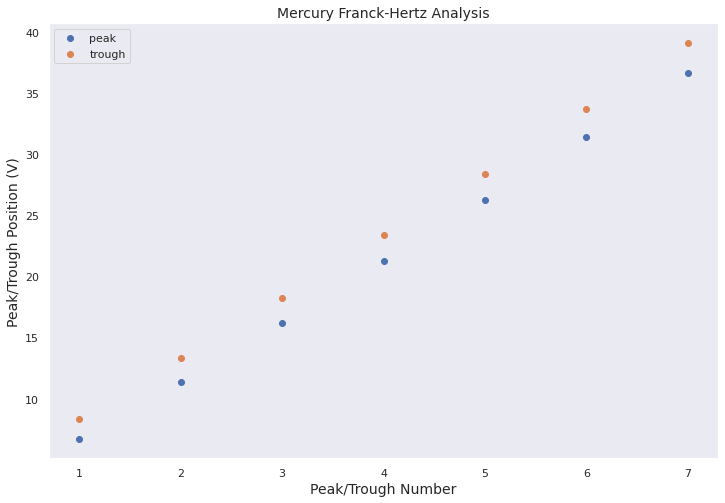

In [27]:
plt.figure(figsize=(12,8))
plt.grid()
plt.title('Mercury Franck-Hertz Analysis',fontsize=14)
plt.ylabel('Peak/Trough Position (V)',fontsize=14)
plt.xlabel('Peak/Trough Number',fontsize=14)
peak = plt.scatter(np.arange(1, len(voltage_peak)+1), voltage_peak, label='peak')
trough = plt.scatter(np.arange(1, len(voltage_trough)+1), voltage_trough, label='trough')

plt.legend(handles=[peak,trough]);

### Fit positions

As before, fit the peak and trough positions to a line ("traditional") and a quadratic (part of RSB method).  Save the parameters.

name,value,standard error,relative error,initial value,min,max,vary
slope,5.10731969,0.03652020,(0.72%),1.0,-inf,inf,True
intercept,3.06951834,0.16332331,(5.32%),0.0,-inf,inf,True


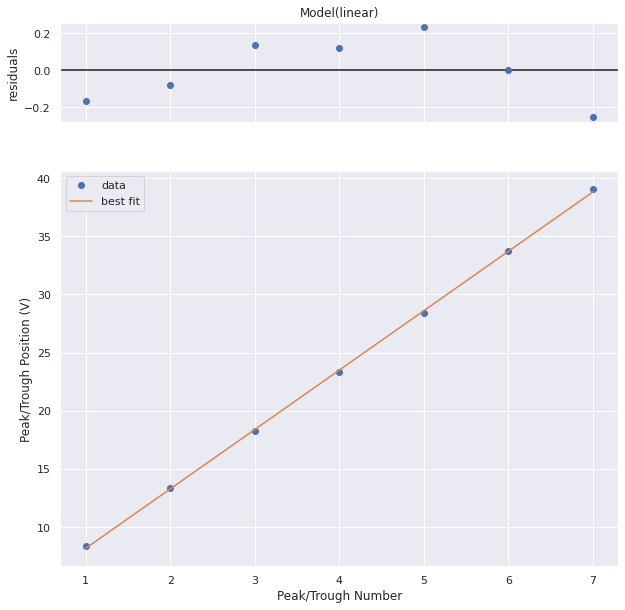

In [28]:
# Line fit, troughs
params_trough_linear = model_fit_and_plot(np.arange(1, len(voltage_trough)+1), voltage_trough)
params_trough_linear

name,value,standard error,relative error,initial value,min,max,vary
a,0.04403947,0.00841726,(19.11%),0.0,-inf,inf,True
b,4.75500397,0.06889821,(1.45%),0.0,-inf,inf,True
c,3.59799193,0.12022245,(3.34%),0.0,-inf,inf,True


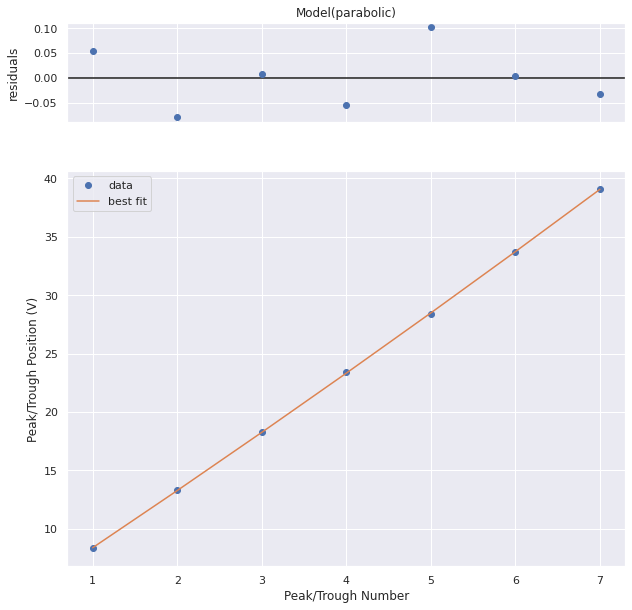

In [29]:
# Quadratic fit, troughs
params_trough_quadratic = model_fit_and_plot(np.arange(1, len(voltage_trough)+1), voltage_trough, model=QuadraticModel())
params_trough_quadratic

name,value,standard error,relative error,initial value,min,max,vary
slope,4.98841313,0.04180507,(0.84%),1.0,-inf,inf,True
intercept,1.45389911,0.18695798,(12.86%),0.0,-inf,inf,True


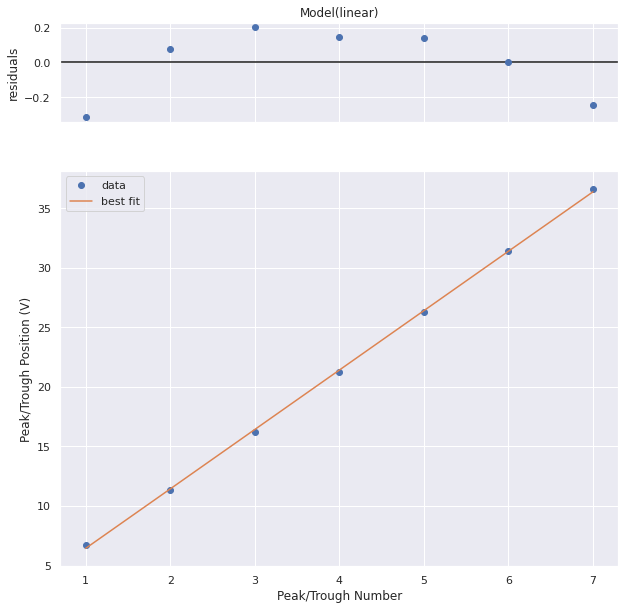

In [30]:
# Line fit, peaks
params_peak_linear = model_fit_and_plot(np.arange(1, len(voltage_peak)+1), voltage_peak)
params_peak_linear

name,value,standard error,relative error,initial value,min,max,vary
a,0.05221822,0.00681966,(13.06%),0.0,-inf,inf,True
b,4.57066735,0.05582136,(1.22%),0.0,-inf,inf,True
c,2.08051778,0.09740429,(4.68%),0.0,-inf,inf,True


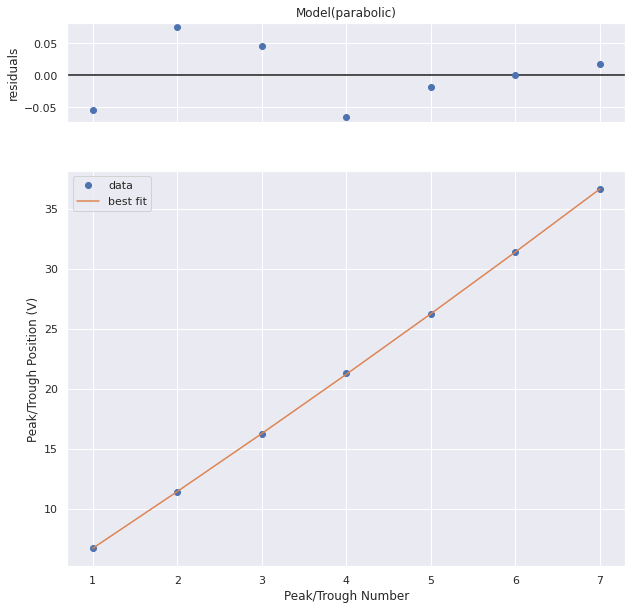

In [31]:
# Quadratic fit, peaks
params_peak_quadratic = model_fit_and_plot(np.arange(1, len(voltage_peak)+1), voltage_peak, model=QuadraticModel())
params_peak_quadratic

### Make a plot

Show, on a single plot, the peak positions, the trough positions (both as dots) with fit lines and fit curves for each.  One member of the grou should include this plot in your Group Document.

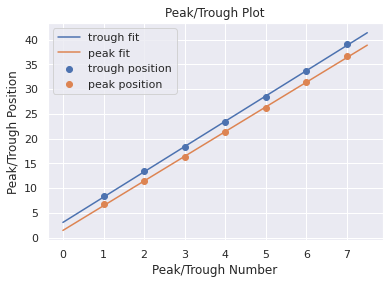

In [32]:
xfit = np.linspace(0,7.5,100) 
line = LinearModel()
trough_line = line.eval(params_trough_linear,x=xfit)

figure, ax = plt.subplots(1,1)
ax.plot(xfit, trough_line, label="trough fit")
ax.scatter(np.arange(1, len(voltage_trough)+1), voltage_trough, label="trough position")
peak_line = line.eval(params_peak_linear, x=xfit)
plt.plot(xfit, peak_line, label="peak fit")
plt.scatter(np.arange(1, len(voltage_peak)+1), voltage_peak, label="peak position")
plt.xlabel("Peak/Trough Number")
plt.ylabel("Peak/Trough Position")
plt.title("Peak/Trough Plot")
plt.legend()

### Calculate peak/trough differences

As before, carry out the RSB approach as they describe it, by taking the <i>differences</i> in the positions of subsequent features to create an array $\Delta E(n) = E_n - E_{n-1}$; note $n$ is the upper number.

Then, plot and fit these to a line.  The energy of the lowest excited state should be given by $\Delta E(0.5)$.  Save the fit parameters as before.

In [33]:
# Same process as before, except you have more data points.
# Recommended: use Python "List comprehensions"

Hg_peak_diffs = voltage_peak[1:7].to_numpy() - voltage_peak[0:6].to_numpy()
Hg_trough_diffs = voltage_trough[1:7].to_numpy() - voltage_trough[0:6].to_numpy()

print('List of Hg peak differences (V):', Hg_peak_diffs)
print('List of Hg trough differences (V):', Hg_trough_diffs)

List of Hg peak differences (V): [4.59772016 4.86195695 5.04692271 4.99407535 5.12619374 5.23188846]
List of Hg trough differences (V): [5.02049903 4.88838063 5.12619374 4.99407535 5.33758318 5.36400686]


name,value,standard error,relative error,initial value,min,max,vary
slope,0.08380081,0.03009766,(35.92%),1.0,-inf,inf,True
intercept,4.82848696,0.11721356,(2.43%),0.0,-inf,inf,True


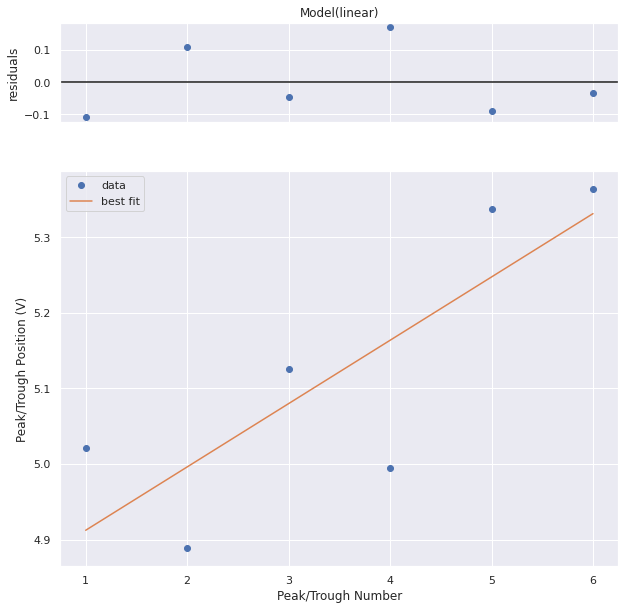

In [34]:
# Line fit to trough diffs
p_trough = model_fit_and_plot(np.arange(1, len(Hg_trough_diffs)+1), Hg_trough_diffs)
p_trough

name,value,standard error,relative error,initial value,min,max,vary
slope,0.11173441,0.02104888,(18.84%),1.0,-inf,inf,True
intercept,4.58538911,0.08197360,(1.79%),0.0,-inf,inf,True


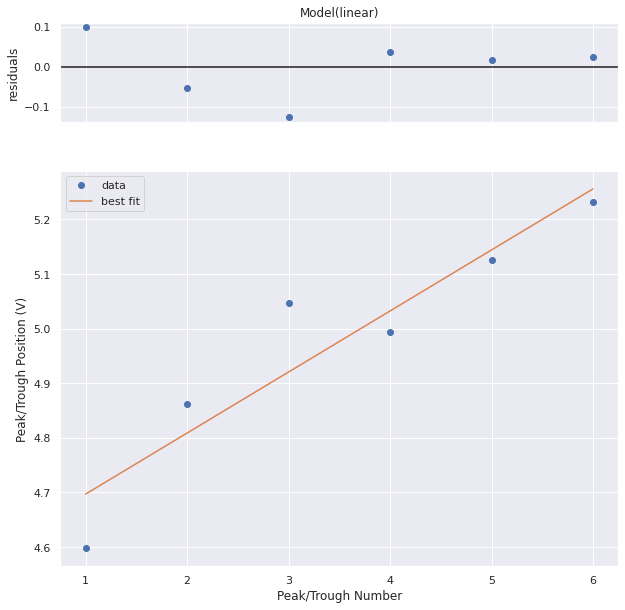

In [35]:
# Line fit to peak diffs
p_peak = model_fit_and_plot(np.arange(1, len(Hg_peak_diffs)+1), Hg_peak_diffs)
p_peak

### Make a differences plot

Show, on a single plot, the peak position differences, the trough position differences (both as dots) with fit lines for each.  One member of the grou should include this plot in your Group Document.

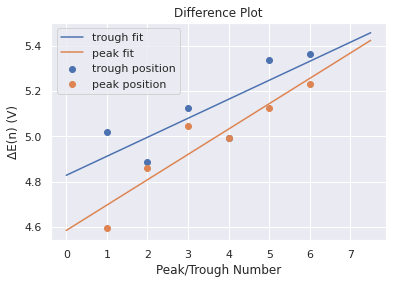

In [36]:
# Plot
xfit = np.linspace(0,7.5,100) 
trough_line = LinearModel().eval(p_trough,x=xfit)
plt.plot(xfit, trough_line, label="trough fit")
peak_line = LinearModel().eval(p_peak,x=xfit)
plt.plot(xfit, peak_line, label="peak fit")
plt.scatter(np.arange(1, len(Hg_trough_diffs)+1), Hg_trough_diffs, label="trough position")
plt.scatter(np.arange(1, len(Hg_peak_diffs)+1), Hg_peak_diffs, label="peak position")
plt.xlabel("Peak/Trough Number")
plt.ylabel("ΔE(n) (V)")
plt.title("Difference Plot")
plt.legend()

## Final results for Hg

Calculate the losest excited state energy, as was done for neon. 

In [37]:
print('CONISISTENCY CHECK OF FIT COEFFICIENTS IN RSB METHOD')
print('Troughs analysis:')
p1 = consistency_check(p_trough, params_trough_quadratic)

print('\nPeaks analysis:')
p2 = consistency_check(p_peak, params_peak_quadratic)

print('\n\nCALCULATION OF FIRST EXCITED STATE OF NEON FROM DIFFERENT METHODS')

Ea_trad_pk = unc.ufloat(params_peak_linear["slope"].value, params_peak_linear["slope"].stderr)
print('"Traditional" average peak spacing: {:.2uP} V'.format(Ea_trad_pk))
Ea_trad_tr = unc.ufloat(params_trough_linear["slope"].value, params_trough_linear["slope"].stderr)
print('"Traditional" average trough spacing: {:.2uP} V'.format(Ea_trad_tr))

# From quadratic fit, see E_a as parameter b
# From RSB n=1/2 method, E_a = p + m/2

print('\nRSB method using line fit to peak/trough position differences')

print('From RSB on trough position, E = {:.2f}'.format(p1[0] + p1[1]/2))
print('From RSB on peak position, E = {:.2f}'.format(p2[0] + p2[1]/2))

print('\nRSB method using quadratic fit to peak/trough positions')

print('From RSB on trough position, E = {:.2f}'.format(p1[3]))
print('From RSB on peak position, E = {:.2f}'.format(p2[3]))


CONISISTENCY CHECK OF FIT COEFFICIENTS IN RSB METHOD
Troughs analysis:
p = b-a: 4.83+/-0.12 = 4.71+/-0.07 = 4.76+/-0.07-0.04+/-0.01
m = 2a: 0.08+/-0.03 = 0.09+/-0.02 = 2*0.04+/-0.01

Peaks analysis:
p = b-a: 4.59+/-0.08 = 4.52+/-0.06 = 4.57+/-0.06-0.05+/-0.01
m = 2a: 0.11+/-0.02 = 0.10+/-0.01 = 2*0.05+/-0.01


CALCULATION OF FIRST EXCITED STATE OF NEON FROM DIFFERENT METHODS
"Traditional" average peak spacing: 4.988±0.042 V
"Traditional" average trough spacing: 5.107±0.037 V

RSB method using line fit to peak/trough position differences
From RSB on trough position, E = 4.87+/-0.12
From RSB on peak position, E = 4.64+/-0.08

RSB method using quadratic fit to peak/trough positions
From RSB on trough position, E = 4.76+/-0.07
From RSB on peak position, E = 4.57+/-0.06


## Calculation of mean free path $\lambda$

The parameter $\lambda/L$ contains the mean free path between electron collisions.  Calculate this value for Hg given the measureable distance between the cathode and grid $L$.  See photos of the apparatus to obtain this value.

NOTE: You cannot use the word `lambda` as a variable in Python.  It is a keyword (something that is defined by the language).

In [38]:
# take differences of the peak/trough positions, and plot/fit these to a line
# ΔE(n), so the slope of this graph is dΔE(n)/dn 
# the unit of total length is mm

def mean_free_path(Ea, slope, L=10):
    λ = L/(2*Ea)*slope
    return λ

In [39]:
## Your code here.  Use uncertainty objects and uncertainties in fit parameters to get uncertainty in mean free path.


print('CALCULATION OF MEAN FREE PATH, RSB METHOD\n')
print('Mean free path from troughs fit = {:.2uP} mm'.format((mean_free_path(p1[0] + p1[1]/2, p1[1]))))
print('Mean free path from peaks fit = {:.2uP} mm'.format((mean_free_path(p2[0] + p2[1]/2, p2[1]))))

# Print comparison to RSB results

# temperature at 160 0.052 mm 145 0.091 mm

CALCULATION OF MEAN FREE PATH, RSB METHOD

Mean free path from troughs fit = 0.086±0.031 mm
Mean free path from peaks fit = 0.120±0.023 mm
